## Setups: Clone repo, install libs, get data and make it usable
This may take some time...

> After finishing you must restart the runtime




### Clone the LUMA repo  

In [ ]:
!git clone https://github.com/bezirganyan/LUMA.git

Cloning into 'LUMA'...
remote: Enumerating objects: 391, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 391 (delta 72), reused 78 (delta 25), pack-reused 246 (from 1)
Receiving objects: 100% (391/391), 2.06 MiB | 30.97 MiB/s, done.
Resolving deltas: 100% (229/229), done.


### Get the data

In [ ]:
cd LUMA

/content/LUMA


In [ ]:
!git config --global credential.helper store

In [ ]:
!git lfs install

Updated git hooks.
Git LFS initialized.


### Install the libs

In [ ]:
%%capture
!pip install -q omegaconf audiomentations Wand nlpaug
!sudo apt-get install libmagickwand-dev
!pip install -q -U accelerate bitsandbytes git+https://github.com/huggingface/transformers.git
!pip install -U bitsandbytes

### Get image data

In [ ]:
mkdir data

In [ ]:
!wget https://huggingface.co/datasets/bezirganyan/LUMA/resolve/main/edm_images.pickle -P ./data

--2024-12-18 15:19:17--  https://huggingface.co/datasets/bezirganyan/LUMA/resolve/main/edm_images.pickle
Resolving huggingface.co (huggingface.co)... 13.35.210.66, 13.35.210.77, 13.35.210.114, ...
Connecting to huggingface.co (huggingface.co)|13.35.210.66|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/91/6d/916d91190e01032d29384546038721047bf54420deab1052a661200d4b695d3d/6154eebb09549ebc085e12e26b2e3ec119d31f0a12dc0e5993d1e7546b0e3767?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27edm_images.pickle%3B+filename%3D%22edm_images.pickle%22%3B&Expires=1734794357&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczNDc5NDM1N319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zLzkxLzZkLzkxNmQ5MTE5MGUwMTAzMmQyOTM4NDU0NjAzODcyMTA0N2JmNTQ0MjBkZWFiMTA1MmE2NjEyMDBkNGI2OTVkM2QvNjE1NGVlYmIwOTU0OWViYzA4NWUxMmUyNmIyZTNlYzExOWQzMWYwYTEyZGMwZTU5OTNkMWU3NTQ2YjBlMzc2Nz9yZXNwb25zZ

# Image data is here

In [ ]:
cd LUMA

/content/LUMA


In [35]:
from get_unprocessed_data import generate_image_modality

images = generate_image_modality('wawa','wiwa')

[*] Generating image modality


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
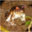

In [ ]:
image.iloc[0].image

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
import torch
import numpy as np
from PIL import Image
import requests



In [ ]:
from transformers import BitsAndBytesConfig
import torch
nf4_config = BitsAndBytesConfig(
   load_in_4bit=True,
   bnb_4bit_quant_type="nf4",
   bnb_4bit_use_double_quant=True,
   bnb_4bit_compute_dtype=torch.bfloat16
)

In [ ]:
from transformers import AutoTokenizer, PaliGemmaForConditionalGeneration, PaliGemmaProcessor
import torch

device="cuda"
model_id = "google/paligemma-3b-mix-224"
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.bfloat16,
                                                          quantization_config=nf4_config, device_map={"":0})
processor = PaliGemmaProcessor.from_pretrained(model_id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

In [ ]:
model.to(device)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


In [ ]:
img_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/bee.JPG?download=true"
input_image = Image.open(requests.get(img_url, stream=True).raw)

In [28]:
type(input_image)

PIL.JpegImagePlugin.JpegImageFile

In [68]:
input_text = "Describe the content of this image in detail"

In [54]:
import random

In [62]:
idx = random.randint(0,len(images))

In [73]:
idx

26603

array([[[ 17,  24,  16],
        [ 24,  30,  20],
        [ 35,  32,  21],
        ...,
        [ 66,  75,  56],
        [ 81,  73,  35],
        [ 35,  36,  23]],

       [[ 27,  36,  26],
        [ 28,  38,  26],
        [ 46,  48,  32],
        ...,
        [ 92, 103,  82],
        [ 87,  79,  52],
        [ 32,  33,  21]],

       [[ 36,  50,  38],
        [ 41,  53,  40],
        [ 65,  66,  45],
        ...,
        [103, 115,  93],
        [ 98,  97,  75],
        [ 43,  44,  32]],

       ...,

       [[150, 165, 152],
        [156, 167, 154],
        [159, 168, 155],
        ...,
        [168, 177, 164],
        [167, 174, 161],
        [157, 170, 160]],

       [[154, 166, 152],
        [160, 167, 152],
        [161, 169, 153],
        ...,
        [165, 175, 162],
        [155, 170, 162],
        [147, 165, 161]],

       [[152, 160, 146],
        [148, 157, 145],
        [149, 160, 148],
        ...,
        [162, 169, 158],
        [137, 158, 155],
        [133, 156, 154]]], dtype=uint8)
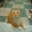

In [63]:
images.iloc[idx].image

In [69]:
image = Image.fromarray(images.iloc[idx].image)

In [70]:
inputs = processor(text=input_text, images=image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
inputs = inputs.to(dtype=model.dtype)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


In [72]:
with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

print(processor.decode(output[0], skip_special_tokens=True))

Describe the content of this image in detail
A blurry photo of an orange cat sitting on a bed, its eyes open and its nose pink. The cat has white paws and a white chin. The floor is green and white, with a checkered pattern. The cat is sitting on a blue and white blanket. The photo is blurry, but the cat's eyes are clear and its nose is pink.
